Davies-Bouldin Index: 0.5743006425382767


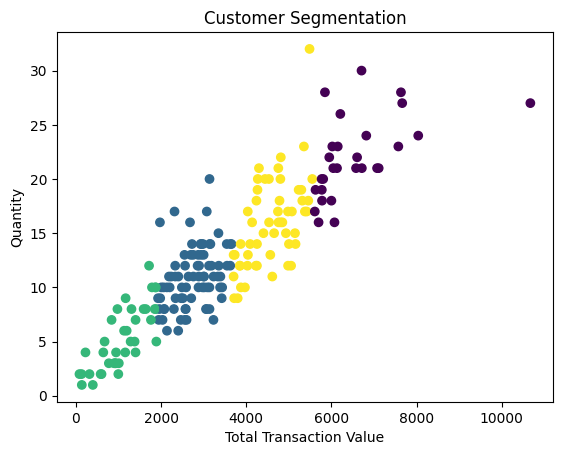

In [1]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("../data/Customers.csv")
products = pd.read_csv("../data/Products.csv")
transactions = pd.read_csv("../data/Transactions.csv")

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Feature engineering for clustering
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_y': 'mean'  # Use the correct 'Price_y' column
}).reset_index()

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(customer_features.iloc[:, 1:])
customer_features['Cluster'] = clusters

# Evaluate clusters using Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features.iloc[:, 1:], clusters)
print("Davies-Bouldin Index:", db_index)

# Visualize clusters
plt.scatter(customer_features['TotalValue'], customer_features['Quantity'], c=customer_features['Cluster'])
plt.title("Customer Segmentation")
plt.xlabel("Total Transaction Value")
plt.ylabel("Quantity")
plt.savefig("../outputs/Rudrakumar_Patel_clustering_visualization.png")  # Save figure with correct name
plt.show()

# Save clustering results to PDF
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('../outputs/Rudrakumar_Patel_Clustering.pdf') as pdf:
    plt.scatter(customer_features['TotalValue'], customer_features['Quantity'], c=customer_features['Cluster'])
    plt.title("Customer Segmentation")
    plt.xlabel("Total Transaction Value")
    plt.ylabel("Quantity")
    pdf.savefig()
    plt.close()
